<a href="https://colab.research.google.com/github/chanseongparkk/2022_Data_Analysis_Intern_practice/blob/main/07_11_03_%EC%8B%9C%EA%B0%81%ED%99%94%ED%83%90%EC%83%89.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 1. 필요 라이브러리 import

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

# os에 따른 font 깨짐 제거를 위해 font 지정

import os

if os.name == "nt":
    font_family = "Malgun Gothic"
else: #mac os
    font_family = "AppleGothic"
    
# - 값이 깨지는 문제 해결을 위해 파라미터값 설정

sns.set(font = font_family, rc = {"axes.unicode_minus" : False})

### 2. 데이터셋 생성

* 팁 데이터셋: 레스토랑에 방문한 손님이 팁을 얼마나 주는지, 성별, 흡연여부, 요일 등에 대한 정보를 가지고 있는 데이터셋

In [ ]:
# tip data load

data = sns.load_dataset("tips")

### 3. 시각화 탐색

#### 3-1 Box Plot

In [ ]:
# 백분위수 계산(quantile)
print(data.tip.quantile([0.05, 0.25, 0.5, 0.75, 0.95]), "\n")

percentages = [0.05, 0.25, 0.5, 0.75, 0.95]

df = pd.DataFrame(data.tip.quantile(percentages))
df.index = [f'{ p * 100}%' for p in percentages]
print(df.T)

0.05    1.4400
0.25    2.0000
0.50    2.9000
0.75    3.5625
0.95    5.1955
Name: tip, dtype: float64 

     5.0%  25.0%  50.0%   75.0%   95.0%
tip  1.44    2.0    2.9  3.5625  5.1955


Text(0, 0.5, '달러($)')

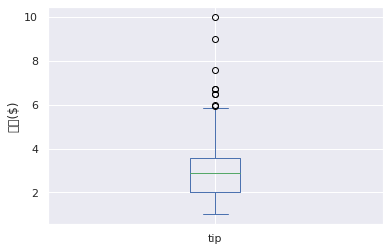

In [ ]:
# 한 변수에 대한 이상값 시각화
ax = (data.tip).plot.box()
ax.set_ylabel("달러($)")

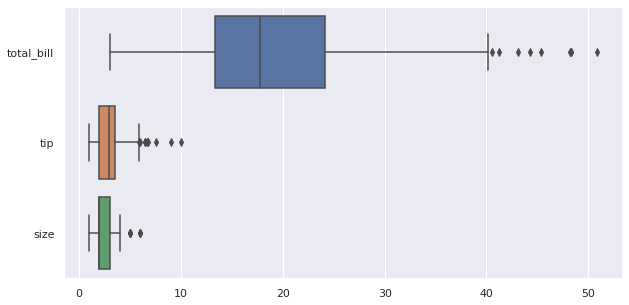

In [ ]:
# 박스플롯을 이용한 전체 변수의 이상값 확인
plt.figure(figsize = (10,5))
sns.boxplot(data = data, orient = "h")
plt.show()

#### 3-2 Bar Plot

In [ ]:
# 요일 별 tip 비교
tip_sum_day = data.groupby("day").tip.sum()
tip_sum_day

day
Thur    171.83
Fri      51.96
Sat     260.40
Sun     247.39
Name: tip, dtype: float64

<BarContainer object of 4 artists>

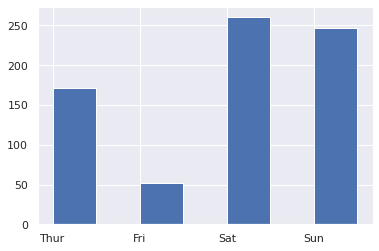

In [ ]:
# matplotlib barplot 

label = ["Thur", "Fri", "Sat", "Sun"]
plt.bar(label,tip_sum_day, width = 0.5, align = "edge")

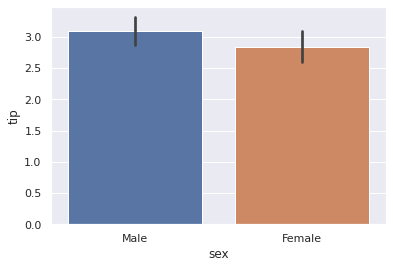

In [ ]:
# seaborn barplot
# 성별, 평균 팁 비교
 
sns.barplot(data = data, x = "sex", y = "tip")

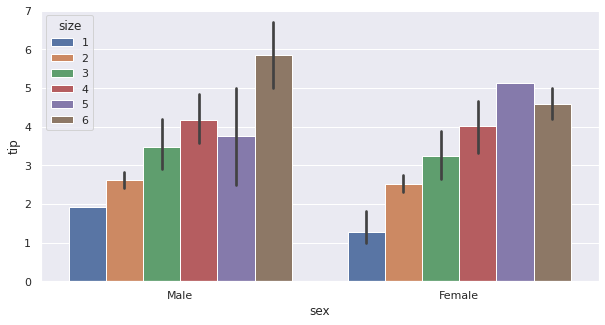

In [ ]:
# 식사 인원 별 남성과 여성 tip 평균 비교

plt.figure(figsize = (10,5))
sns.barplot(data = data, x = "sex", y = "tip", hue = "size")

#### 3-3 도수분포표 & 히스토그램 

In [ ]:
# 도수분포표
# 총 계산 금액 구간 별 빈도수

bin_total = pd.cut(data.total_bill, 8) #data를 8개 구간별로 잘라서 갯수 세어줌
bin_total.value_counts()

(15.005, 20.972]    81
(9.038, 15.005]     68
(20.972, 26.94]     38
(26.94, 32.908]     24
(3.022, 9.038]      12
(32.908, 38.875]    10
(38.875, 44.842]     6
(44.842, 50.81]      5
Name: total_bill, dtype: int64

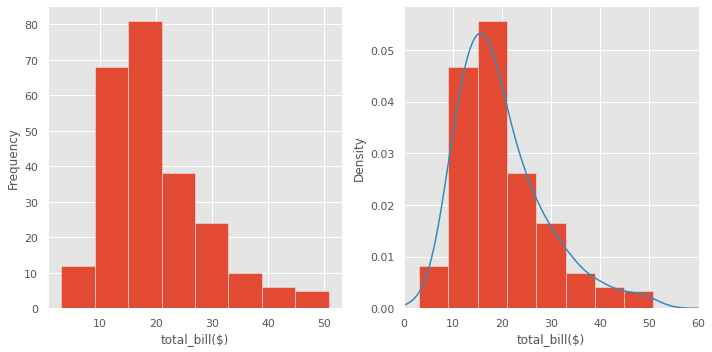

In [ ]:
fig, axs = plt.subplots(1, 2, figsize = (10,5))

# histogram
plt.style.use("ggplot")
ax1 = plt.subplot(1,2,1)
ax1 = (data.total_bill).plot.hist(bins = 8)
ax1.set_xlabel('total_bill($)');

# distplot
plt.subplot(1,2,2)
ax2 = data["total_bill"].plot.hist(density = True, xlim = [0,60], bins = 8)
data.total_bill.plot.density(ax = ax2);
ax2.set_xlabel("total_bill($)");

plt.tight_layout()
plt.show()
